<a href="https://colab.research.google.com/github/AngieQuirogar/Proyectocolaboratory/blob/main/Analisis_dataset_centros_Sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd #se importan las librerías necesarias para hacer el análisis
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/AngieQuirogar/Proyectocolaboratory/main/Georeferenciaci_n_Centros_de_Aprendizaje_SENA_20240731.csv"
df = pd.read_csv(url) #se copia el url de los datos que se encuentran en GiHub

In [3]:
df.head() #se muestran los datos del inicio del dataset

,CENTRO_FORMACION,CODIGO_CENTRO,LATITUD,LONGITUD,GEORREFERENCIACION,NOMBRE_REGIONAL,CODIGO_REGIONAL,NOMBRE_DEPARTAMENTO,CODIGO_DEPARTAMENTO,NOMBRE_MUNICIPIO,CODIGO_MUNICIPIO
0,CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...,9101,6.053527,-75.62891,POINT (-75.62891 6.053527),5,REGIONAL ANTIOQUIA,ANTIOQUIA,5,MEDELLIN,1
1,CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...,9103,10.987720,-74.78277,POINT (-74.78277 10.98772),8,REGIONAL ATLANTICO,ATLANTICO,8,BARRANQUILLA,1
2,CENTRO AGROEMPRESARIAL Y MINERO,9104,10.373000,-75.46100,POINT (-75.461 10.373),13,REGIONAL BOLIVAR,BOLIVAR,13,CARTAGENA,1
3,CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...,9110,5.825560,-73.02979,POINT (-73.02979 5.82556),15,REGIONAL BOYACA,BOYACA,15,TUNJA,1
4,CENTRO PARA LA FORMACION CAFETERA,9112,5.032900,-75.45060,POINT (-75.4506 5.0329),17,REGIONAL CALDAS,CALDAS,17,MANIZALES,1


In [4]:
registros_con_comillas_dobles = df['CENTRO_FORMACION'].str.contains('"').sum() #limpieza de datos, se busca si hay comillas
registros_con_comillas_simples = df['CENTRO_FORMACION'].str.contains("'").sum()
total_registros_con_comillas = registros_con_comillas_dobles + registros_con_comillas_simples

In [5]:
registros_con_comas = df['CENTRO_FORMACION'].str.contains(',').sum() #limpieza de datos, se busca si hay registros con comas
registros_con_comas

1

In [6]:
df['CENTRO_FORMACION'] = df['CENTRO_FORMACION'].str.replace(',', '').str.replace("'", '') #se reemplazan las comas con un espacio

In [7]:
registros_con_comas = df['CENTRO_FORMACION'].str.contains(',').sum() #se revisa que el conjunto de datos ya no tenga comas
registros_con_comas

0

In [8]:
registros_con_puntoycomas = df['CENTRO_FORMACION'].str.contains(';').sum() #revisar que no haya registros con ;
registros_con_puntoycomas

0

In [9]:
print(df.info()) #mostrar la información del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CENTRO_FORMACION     118 non-null    object 
 1   CODIGO_CENTRO        118 non-null    int64  
 2   LATITUD              118 non-null    float64
 3   LONGITUD             118 non-null    float64
 4   GEORREFERENCIACION   118 non-null    object 
 5   NOMBRE_REGIONAL      118 non-null    int64  
 6   CODIGO_REGIONAL      118 non-null    object 
 7   NOMBRE_DEPARTAMENTO  118 non-null    object 
 8   CODIGO_DEPARTAMENTO  118 non-null    int64  
 9   NOMBRE_MUNICIPIO     118 non-null    object 
 10  CODIGO_MUNICIPIO     118 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 10.3+ KB
None


In [10]:
num_registros = df.shape[0]
print(f"El número de registros del dataset es: {num_registros}")

El número de registros del dataset es: 118


In [11]:
print(df.isnull().sum()) #identificar si hay valores nulos

CENTRO_FORMACION       0
CODIGO_CENTRO          0
LATITUD                0
LONGITUD               0
GEORREFERENCIACION     0
NOMBRE_REGIONAL        0
CODIGO_REGIONAL        0
NOMBRE_DEPARTAMENTO    0
CODIGO_DEPARTAMENTO    0
NOMBRE_MUNICIPIO       0
CODIGO_MUNICIPIO       0
dtype: int64


Todas las filas de nuestro conjunto de datos contienen valores, la información está completa.

In [12]:
duplicados_centro_formacion = df[df.duplicated(subset=['CODIGO_CENTRO'])] #revisar si hay datos duplicados
print("Filas con 'CENTRO_FORMACION' duplicado:")
print(duplicados_centro_formacion)

Filas con 'CENTRO_FORMACION' duplicado:
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
111            CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA           9518   
112  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   
113  CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   
114  CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...           9547   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
117  CENTRO DE PRODUCCION Y TRANSFORMACION AGROINDU...           9531   

       LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
111   0.505059 -76.501705   POINT (-76.501705 0.505059)               86   
112  12.576799 -81.701032  POINT (-81.701032 12.576799)               88   
113  -4.210806 -69.945538  POINT (-69.945538 -4.210806)               91   
114   3.874345 -67.921817   POINT (-67.921817 3.874345)               94   
116   1.249076 -70.235523   POINT (-70.235523 1.249076)             

In [13]:
codigo_buscar = 9518 #de acuerdo con la información anterior, se detalla sobre los posiblres registros duplicados
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                            CENTRO_FORMACION  CODIGO_CENTRO   LATITUD  \
74   CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA           9518  0.498870   
111  CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA           9518  0.505059   

      LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
74  -76.505000      POINT (-76.505 0.49887)               86   
111 -76.501705  POINT (-76.501705 0.505059)               86   

       CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
74   REGIONAL PUTUMAYO            PUTUMAYO                   86   
111  REGIONAL PUTUMAYO            PUTUMAYO                   86   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
74             MOCOA                 1  
111            MOCOA                 1  


In [14]:
codigo_buscar = 9539
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
102  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   
112  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   

       LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
102  12.578130 -81.699558   POINT (-81.699558 12.57813)               88   
112  12.576799 -81.701032  POINT (-81.701032 12.576799)               88   

         CODIGO_REGIONAL       NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
102  REGIONAL SAN ANDRES  SAN ANDRES Y PROVIDENCIA                   88   
112  REGIONAL SAN ANDRES  SAN ANDRES Y PROVIDENCIA                   88   

     NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
102  SAN ANDRES ISLAS                 1  
112  SAN ANDRES ISLAS                 1  


In [42]:
codigo_buscar = 9517 #se evidencia que hay diferencias en la longitud y latitud de los posibles duplicados, por lo tanto se descarta que sea un registro duplicado
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
73   CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   
113  CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   

      LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
73  -4.210950 -69.943075   POINT (-69.943075 -4.21095)               91   
113 -4.210806 -69.945538  POINT (-69.945538 -4.210806)               91   

       CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
73   REGIONAL AMAZONAS            AMAZONAS                   91   
113  REGIONAL AMAZONAS            AMAZONAS                   91   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
73           LETICIA                 1  
113          LETICIA                 1  


In [16]:
codigo_buscar = 9548 #acá sí se evidencia que el registro está duplicado, toda la información de un registro es la misma de otro
resultado = df[df['CODIGO_CENTRO'] == codigo_buscar]
print(resultado)

                                      CENTRO_FORMACION  CODIGO_CENTRO  \
98   CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
98   1.249076 -70.235523  POINT (-70.235523 1.249076)               97   
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
98   REGIONAL VAUPES              VAUPES                   97   
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
98              MITU                 1  
116             MITU                 1  


In [17]:
print(df.duplicated().sum())

1


In [18]:
duplicados = df[df.duplicated()] #revisar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
116  CENTRO AGROPECUARIO Y DE SERVICIOS AMBIENTALES...           9548   

      LATITUD   LONGITUD           GEORREFERENCIACION  NOMBRE_REGIONAL  \
116  1.249076 -70.235523  POINT (-70.235523 1.249076)               97   

     CODIGO_REGIONAL NOMBRE_DEPARTAMENTO  CODIGO_DEPARTAMENTO  \
116  REGIONAL VAUPES              VAUPES                   97   

    NOMBRE_MUNICIPIO  CODIGO_MUNICIPIO  
116             MITU                 1  


In [19]:
df_sin_duplicados = df.drop_duplicates() #eliminar los datos duplicados del dataset

print("DataFrame sin duplicados:")
print(df_sin_duplicados)

DataFrame sin duplicados:
                                      CENTRO_FORMACION  CODIGO_CENTRO  \
0    CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...           9101   
1    CENTRO PARA EL DESARROLLO AGROECOLOGICO Y AGRO...           9103   
2                      CENTRO AGROEMPRESARIAL Y MINERO           9104   
3    CENTRO DE DESARROLLO AGROPECUARIO Y AGROINDUST...           9110   
4                    CENTRO PARA LA FORMACION CAFETERA           9112   
..                                                 ...            ...   
112  CENTRO DE FORMACION TURISTICA GENTE DE MAR Y D...           9539   
113  CENTRO PARA LA BIODIVERSIDAD Y EL TURISMO DEL ...           9517   
114  CENTRO AMBIENTAL Y ECOTURISTICO DEL NORORIENTE...           9547   
115  CENTRO DE DESARROLLO AGROINDUSTRIAL TURISTICO ...           9533   
117  CENTRO DE PRODUCCION Y TRANSFORMACION AGROINDU...           9531   

       LATITUD   LONGITUD            GEORREFERENCIACION  NOMBRE_REGIONAL  \
0     6.053527 -75.62

In [20]:
num_registros = df_sin_duplicados.shape[0]
print(f'El número de registros del data set es: {num_registros}')

El número de registros del data set es: 117


In [21]:
df_sin_duplicados.columns

Index(['CENTRO_FORMACION', 'CODIGO_CENTRO', 'LATITUD', 'LONGITUD',
       'GEORREFERENCIACION', 'NOMBRE_REGIONAL', 'CODIGO_REGIONAL',
       'NOMBRE_DEPARTAMENTO', 'CODIGO_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
       'CODIGO_MUNICIPIO'],
      dtype='object')

In [23]:
numero_centros_por_departamento = df_sin_duplicados.groupby('NOMBRE_DEPARTAMENTO')['CENTRO_FORMACION'].count() #ver cuantos centros de formación hay por cada departamento
numero_centros_ordenados = numero_centros_por_departamento.sort_values(ascending=False)
print(numero_centros_ordenados)

NOMBRE_DEPARTAMENTO
ANTIOQUIA                   20
BOGOTA D.C.                 17
CAUCA                        7
VALLE DEL CAUCA              5
ATLANTICO                    5
HUILA                        4
CALDAS                       4
NARINO                       4
BOYACA                       4
BOLIVAR                      4
SANTANDER                    3
META                         3
CESAR                        3
RISARALDA                    3
CORDOBA                      3
CUNDINAMARCA                 3
PUTUMAYO                     2
NORTE DE SANTANDER           2
SAN ANDRES Y PROVIDENCIA     2
AMAZONAS                     2
MAGDALENA                    2
LA GUAJIRA                   2
GUAINIA                      2
CAQUETA                      2
VICHADA                      2
QUINDIO                      1
CHOCO                        1
CASANARE                     1
SUCRE                        1
TOLIMA                       1
ARAUCA                       1
VAUPES             

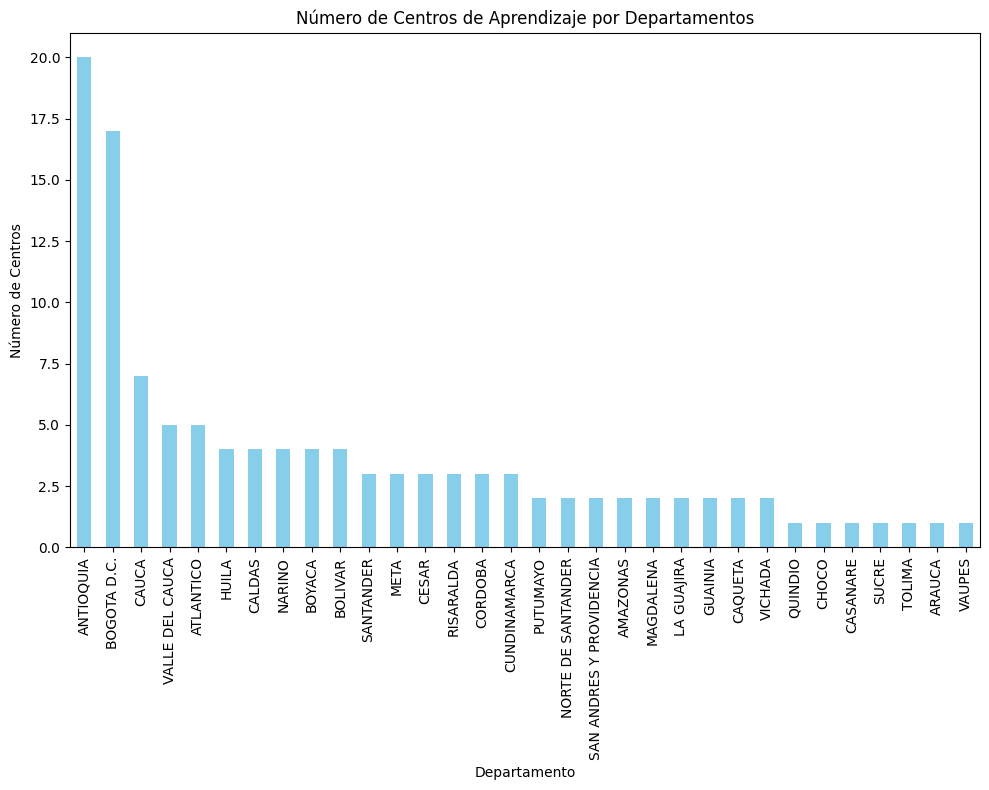

In [46]:
plt.figure(figsize=(10, 8))
numero_centros_ordenados.plot(kind='bar', color='skyblue')
plt.title('Número de Centros de Aprendizaje por Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Número de Centros')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Distribución por departamento:
La gráfica de barras muestra la cantidad de centros de aprendizaje por departamento. Se observa una mayor concentración en departamentos como Antioquia y Bototá, lo que sugiere una tendencia a concentrar más centros en áreas más pobladas o de mayor actividad económica.

In [32]:
pip install folium

In [33]:
import folium

In [35]:
mapa = folium.Map(location=[4.5709,-74.2973], zoom_start=5)
for index, row in df_sin_duplicados.iterrows():
  folium.Marker([row['LATITUD'], row['LONGITUD']], popup=row['CENTRO_FORMACION']).add_to(mapa)

In [36]:
mapa

**Conclusiones generales:**

*Integridad y limpieza de los datos:* el conjunto de datos inicial tiene duplicados y valores nulos que fueron identificados y eliminados, lo cual es crucial para asegurar la calidad y precisión de cualquier análisis posterior. La estandarización ayuda a mantener la consistencia en los datos y facilita su uso en análisis y visualizaciones.

*Número de centros por departamento:* el agrupamiento y conteo de centros por departamento muestra una distribución desigual, con algunos deoartamentos teniendo una mayor cantidad de centros que otros. Esto podría reflejar diferencias en la demanda de formación profesional, la densidad de la población, y/o las políticas regionales de educacion y formación. El análisis de los datos muestra que algunos departamentos tienen una mayor concentración de centros de formación. Estos departamentos podrían ser el foco de futuros estudios para entender las razones detrás de esta concentración.

*Distribución geográfica de los centros de formación:* la visualización de los datos en el mapa interactivo con Folium muestra la dispersión geográfica de los centros de formación. Esto puede ayudar a identificar áreas con alta concentración de centros, así como regiones que pueden estar desatendidas.

*Visualización de la distribución por región:* la gráfica de barras muestra la distribución de los centros de formación por región. Las regiones con mayor cantidad de centros podrían ser las más industrializadas o aquellas con mayor población estudiantil.

*Visualización final:* la validación final asegura que después de la limpieza y estandarización, no queden valores nulos ni duplicados, garantizando así la calidad de los datos para cualquier análisis adicional.

**Implicaciones prácticas:**

*Planificación y distribución de recursos:*
- Las autoridades del SENA y otros organismos educativos pueden utilizar esta información para planificar la distribución por recursos y la apertura de nuevos centros de formación en regiones que actualmente están desatendidas.
- La identificación de áreas con alta concentración de centros puede ayudar a redistribuir o expandir programas de formación para equilibrar la oferta educativa en todo el país.

*Poíticas educativas regionles:*
- La información sobre la distribución de centros por departamento y región puede informar las políticas educativas regionales y ayudar a diseñar estrategias que aborden las necesidades específicas de cada área.

*Mejoras en la calidad de los datos:*
- El proceso de limpieza y estandarización de datos destaca la importancia de mantener bases de datos limpias y estandarizadas para facilitar análisis precisos y útiles.


**Recomendaciones futuras:**

*Análisis demográficos y socioconómicos:*
- Realizar análisis adicionales que correlacionen la distribución de los centros con variables demográficas y socioeconómicas, como población, tasa de desempleo, y nivel educativo de la región.

*Estudio de demanda:*
- Investigar la demanda de formación profesional en diferentes regiones para ajustar la oferta de cursos y programas a las necesidades locales.

*Monitoreo continuo:*
- Establecer un sistema de monitoreo continuo de los datos para mantener actualizada la información sobre los centros de formación y detectar rápidamente cualquier anomalía o necesidad de actualización.

- Promover programas de divulgación de los diferentes cursos o carreras tecnológicas en los centros con menor acceso, esto con el fin de promulgar y dar a conocer la oferta del SENA.